In [24]:
#!cp 11-gmm.py 8-EM.py
!chmod +x *.py

In [105]:
import scipy
import sklearn

In [ ]:
imp

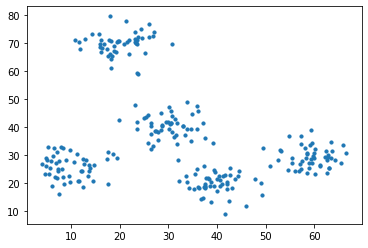

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [39]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
""" initialize cluster centroids for K-means """

import numpy as np


def initialize(X, k):
    """ doc """
    try:
        n, d = X.shape
        return np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    except Exception:
        return None

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

[[30.06722465 40.41123947]
 [20.0835633  69.81592298]
 [39.62770705 19.89843487]
 [ 9.92511389 25.73098987]
 [59.22766628 29.19796006]]
[0 0 1 0 4 3 0 2 1 2 2 0 1 2 1 3 2 4 2 1 3 0 1 4 0 3 2 2 3 4 4 0 1 3 2 0 4
 0 4 1 1 2 0 3 2 0 0 0 1 4 4 1 0 1 0 3 0 3 0 0 3 3 4 3 4 4 0 2 1 4 1 2 0 0
 3 0 1 3 0 1 4 0 4 1 3 2 3 0 4 1 0 3 4 0 0 1 3 1 2 4 0 3 4 2 2 0 3 2 4 2 3
 3 2 1 2 3 3 1 3 3 2 2 0 1 0 1 1 4 1 3 0 3 4 1 4 3 0 2 0 4 0 4 1 4 1 1 4 3
 3 1 4 3 4 2 1 1 1 4 4 2 3 3 0 2 2 4 2 3 1 1 1 1 0 2 4 1 3 4 4 3 2 2 3 1 3
 1 2 2 1 1 4 2 4 0 2 2 4 4 3 0 4 2 2 0 4 1 4 3 0 4 0 3 0 3 3 0 0 3 1 0 1 2
 2 3 1 2 4 2 4 1 1 2 2 4 2 4 2 0 3 4 4 4 3 1 2 0 3 2 3 2]


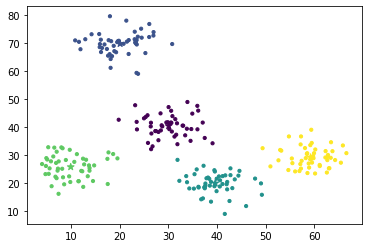

In [38]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#kmeans = __import__('1-kmeans').kmeans

def kmeans(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    km = KMeans(n_clusters=k, n_init=1, max_iter=iterations).fit(X)
    return km.cluster_centers_, km.labels_

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    k = 5
    C, clss = kmeans(X, k)
    print(C)
    print(clss)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(k)))
    plt.show()

In [41]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
kmeans = __import__('1-kmeans').kmeans

def kmeallns(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    if type(iterations) is not int or iterations < 1:
        return None, None
    C = initialize(X, k)
    if C is None:
        return None, None
    clss = None
    for itr in range(iterations):
        prevC = C.copy()
        clss = np.apply_along_axis(np.subtract, 1, X, C)
        clss = np.argmin(np.square(clss).sum(axis=2), axis=1)
        for cent in range(k):
            Xs = np.argwhere(clss == cent)
            if Xs.shape[0] == 0:
                C[cent] = initialize(X, 1)
            else:
                C[cent] = np.mean(X[Xs], axis=0)
        if np.all(prevC == C):
            break;
    return C, clss

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    k = 3
    C, clss = kmeans(X, k)
    print(C)
    print("____________")
    print(clss.shape)
    print(clss)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(k)))
    plt.show()

AxisError: axis 2 is out of bounds for array of dimension 2

In [50]:
#!/usr/bin/env python3

import numpy as np
#kmeans = __import__('1-kmeans').kmeans


def initialize(X, k):
    """ doc """
    try:
        n, d = X.shape
        if k == 0 or d == 0:
            return None
        return np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    except Exception:
        return None


def kmeans(X, k, iterations=1000):
    """ doc """
    try:
        n, d = X.shape
        if type(iterations) is not int or iterations < 1:
            return None, None
        C = initialize(X, k)
        if C is None:
            return None, None
        clss = None
        for itr in range(iterations):
            prevC = C.copy()
            clss = np.apply_along_axis(np.subtract, 1, X, C)
            clss = np.argmin(np.square(clss).sum(axis=2), axis=1)
            for cent in range(k):
                Xs = np.argwhere(clss == cent)
                if Xs.shape[0] == 0:
                    C[cent] = initialize(X, 1)
                else:
                    C[cent] = np.mean(X[Xs], axis=0)
            if np.all(prevC == C):
                break
        clss = np.apply_along_axis(np.subtract, 1, X, C)
        clss = np.argmin(np.square(clss).sum(axis=2), axis=1)
        return C, clss
    except Exception:
        raise
        return None, None
if __name__ == "__main__":
    np.random.seed(1)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5, iterations=1)
    print(C)
    print(clss)
    C, clss = kmeans(X, 5, iterations=5)
    print(C)
    print(clss)

[[16.50913999 71.52683633]
 [61.47756009 30.9697292 ]
 [22.72884706 69.7335632 ]
 [11.53709735 25.95849056]
 [37.24537546 29.44317077]]
[4 1 3 3 4 0 4 1 2 4 4 4 4 4 0 4 1 1 4 2 4 4 4 4 4 2 1 3 0 3 4 2 1 4 4 4 1
 2 4 3 4 2 4 0 4 1 2 2 4 2 4 4 1 4 1 4 4 0 4 4 2 4 3 0 3 4 4 4 2 4 4 3 4 4
 2 4 4 0 4 4 3 4 3 1 3 3 0 0 4 4 1 3 2 1 3 2 4 2 2 4 2 3 3 1 4 4 1 4 1 4 3
 4 3 3 3 3 4 2 1 3 3 1 3 3 1 4 4 3 1 4 1 4 4 3 3 4 4 1 1 1 4 4 1 4 4 4 1 4
 4 4 4 4 1 3 3 3 3 4 4 3 1 4 4 4 0 4 4 1 3 4 1 3 1 0 0 3 3 4 0 4 1 2 4 4 1
 1 1 1 2 3 2 4 0 4 1 1 3 1 4 1 1 3 3 0 3 4 4 0 1 4 2 0 3 3 0 0 0 2 4 1 4 0
 4 4 4 4 3 1 1 3 1 4 0 0 2 1 4 3 4 3 0 1 1 3 2 4 2 4 1 3]
[[19.99217595 70.52260338]
 [30.51701488 39.69496387]
 [39.98345847 20.39391282]
 [11.26244158 24.95991664]
 [60.0324338  30.17853418]]
[2 4 3 3 1 0 2 4 0 1 1 2 2 1 0 1 4 4 1 0 2 1 1 1 2 0 4 3 0 3 1 0 4 1 2 2 4
 0 2 3 2 0 1 0 1 4 0 0 1 0 2 1 4 2 4 1 1 0 1 2 0 2 3 0 3 1 2 2 0 2 1 3 2 1
 0 1 2 0 2 2 3 1 3 4 3 3 0 0 2 2 4 3 0 4 3 0 1 0 0 2 0 3 3 4 2 2 4 1 2

In [11]:
if Xs.shape[0] == 0:
                    C[cent] = initialize(X, 1)
                else:
                    

[[54.60897082 24.39373131]
 [ 9.59349574 24.9424616 ]
 [32.97536588 32.34962841]
 [60.59904135 31.79479493]]
[3 0 0 1 1 1 2 1 0 1 3 3 1 3 3 2 1 1 2 2 2 3 0 0 3 1 1 1 1 0 0 1 3 3 3 3 3
 0 1 1 1 0 2 0 3 2 1 1 0 1 3 1 1 1 3 2 1 1 0 1 2 1 0 2 2 1 0 1 2 3 1 1 2 1
 3 0 2 0 3 3 1 1 1 3 2 1 0 3 3 2 2 3 3 0 3 0 1 0 0 2 1 3 1 1 1 2 3 1 1 3 1
 0 3 2 3 3 1 3 0 2 3 1 2 2 3 3 2 1 3 1 1 2 0 1 2 0 0 1 0 3 1 2 3 1 2 3 3 3
 1 0 1 2 1 0 0 1 1 2 1 0 2 3 2 0 3 3 0 1 2 1 2 2 2 3 1 3 0 1 1 2 1 1 1 3 2
 0 0 1 0 2 1 1 1 0 1 1 3 1 0 2 2 0 2 0 1 2 3 2 2 2 1 3 1 3 1 2 0 1 3 1 0 1
 2 3 1 1 2 2 2 2 2 0 3 2 0 1 0 0 1 1 3 3 2 0 2 1 2 2 3 0 1 2 1 1 0 3 1 1 1
 1 1 3 3 1 3 1 1 1 0 1 1 0 0 3 1 2 1 1 1 0 1 1 0 2 1 1 1 0 3 3 1 0 1 1 2 0
 3 0 1 2 0 2 1 2 1 0 0 2 1 3 1 3 0 3 0 3 1 3 3 1 3 3 3 2 3 1 1 1 3 1 1 3 1
 0 1 0 1 0 1 2 3 0 1 1 2 3 2 3 0 2 2 1 2 2 1 0 3 0 1 1 2 3 1 3 3 2 0 3 3 2
 2 1 2 0 0 0 3 1 1 1 1 1 1 0 1 3 1 1 1 2 2 1 3 2 0 1 1 3 1 0]


In [2]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [89]:
#!/usr/bin/env python3

import numpy as np
kmeans = __import__('1-kmeans').kmeans
#variance = __import__('2-variance').variance
def variance(X, C):
    """ doc """
    try:
        sub = np.apply_along_axis(np.subtract, 1, X, C)
        sub2 = np.apply_along_axis(np.subtract, 1, C, X.mean())
        #return ((sub)**2).sum(axis=len(X.shape)).min(axis=1).sum()
        return (np.linalg.norm(sub, axis=2)**2).min(axis=1).sum()
    except Exception:
        return None
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    
    for k in range(1, 11):
        C, _ = kmeans(X, k)
        print('Variance with {} clusters: {}'.format(k, variance(X, C).round(5)))

Variance with 1 clusters: 157927.7052
Variance with 2 clusters: 82095.68297
Variance with 3 clusters: 34784.23723
Variance with 4 clusters: 23158.40095
Variance with 5 clusters: 7868.52123
Variance with 6 clusters: 7406.93077
Variance with 7 clusters: 6930.66361
Variance with 8 clusters: 6162.15884
Variance with 9 clusters: 5843.92455
Variance with 10 clusters: 5727.41124


[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

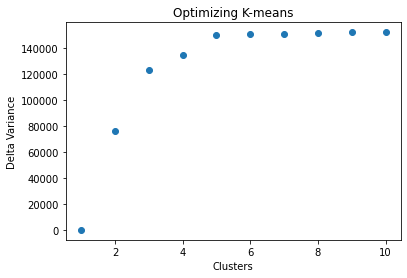

In [96]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
#optimum_k = __import__('3-optimum').optimum_k
def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """ doc """
    if type(X) is not np.ndarray:
        return None, None
    if kmax is None:
        kmax = X.shape[0]
    if ((X.ndim != 2 or type(kmin) is not int
         or kmin < 1 or type(iterations) is not int or iterations < 1
         or type(kmax) is not int or kmax <= kmin)):
        return None, None
    results = [kmeans(X, kmin, iterations)]
    firstvar = variance(X, results[0][0])
    d_vars = [0]
    while kmin < kmax:
        kmin += 1
        C, clss = kmeans(X, kmin, iterations)
        vari = variance(X, C)
        results.append((C, clss))
        d_vars.append(firstvar - vari)
        
    return results, d_vars

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    results, d_vars = optimum_k(X, kmax=10)
    print(results)
    print(np.round(d_vars, 5))
    plt.scatter(list(range(1, 11)), d_vars)
    plt.xlabel('Clusters')
    plt.ylabel('Delta Variance')
    plt.title('Optimizing K-means')
    plt.show()

In [99]:
def initialize(X, k):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(k) is not int or k < 1:
        return None, None, None
    n, d = X.shape
    
    pi = np.full((k,), 1/k)
    m, _ = kmeans(X, k)
    S = np.full((k, d, d), np.identity(d))
    return pi, m, S

import numpy as np
#initialize = __import__('4-initialize').initialize

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    print(pi)
    print(m)
    print(S)

[0.25 0.25 0.25 0.25]
[[54.73711515 31.81393242]
 [16.84012557 31.20248225]
 [21.43215816 65.50449077]
 [32.3301925  41.80664127]]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


In [109]:
#!/usr/bin/env python3

import numpy as np
#pdf = __import__('5-pdf').pdf
#!/usr/bin/env python3
""" performs K-means on a dataset """

import numpy as np

kmeans = __import__('1-kmeans').kmeans


def pdf(X, m, S):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(m) is not np.ndarray or m.ndim != 1\
       or type(S) is not np.ndarray or S.ndim != 2:
        return None
    try:
        n, d = X.shape
        det = np.linalg.det(S)
        if det == 0:
            return None
        X_m = (X - m).T
        Xmul = (X_m * np.matmul(np.linalg.inv(S), X_m)).sum(axis=0)
        exp = np.exp(Xmul / -2)
        sqrt = np.sqrt(np.power(2 * np.pi, d) * det)
        P = (exp / sqrt)
        P = np.maximum(P, 1e-300)
        return P
    except Exception:
        return None

if __name__ == '__main__':
    np.random.seed(0)
    m = np.array([12, 30, 10])
    S = np.array([[36, -30, 15], [-30, 100, -20], [15, -20, 25]])
    X = np.random.multivariate_normal(m, S, 10000)
    P = pdf(X, m, S)
    print(P)


[3.47450910e-05 2.53649178e-06 1.80348301e-04 ... 1.24604061e-04
 1.86345129e-04 2.59397003e-05]


In [52]:
#!/usr/bin/env python3

import numpy as np
initialize = __import__('4-initialize').initialize
#expectation = __import__('6-expectation').expectation
pdf = __import__('5-pdf').pdf
def expectation(X, pi, m, S):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(pi) is not np.ndarray or pi.ndim != 1\
       or type(m) is not np.ndarray or m.ndim != 2\
       or type(S) is not np.ndarray or S.ndim != 3:
        return None, None
    try:
        n, d = X.shape
        k = pi.shape[0]
        k1, d1 = m.shape
        k2, d2, d3 = S.shape
        if (k != k1 or k != k2 or k1 != k2)\
           or (d != d1 or d != d2 or d != d3)\
           or (d1 != d2 or d1 != d3 or d2 != d3)\
           or np.any(np.linalg.det(S)) == 0 or not\
           np.isclose(pi.sum(), 1):
            return None, None
        pdfs = np.ndarray((k, n))
        for i in range(k):
            pdfs[i] = pdf(X, m[i], S[i])
        pdfs = pdfs * pi[:, np.newaxis]
        pdfsum = pdfs.sum(axis=0)
        g = pdfs / pdfsum
        l = np.log(pdfsum).sum()
        return g, l
    except Exception:
        raise
        return None, None

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    #m = np.append(m, np.array([[30], [3], [3], [3]]), 1)
    #print(m)
    g, l = expectation(X, pi, m, S)
    print(g)
    print(np.sum(g, axis=0))
    print(l)

[[1.98542668e-055 1.00000000e+000 1.56526421e-185 ... 1.00000000e+000
  3.70567311e-236 1.91892348e-012]
 [6.97883333e-085 2.28658376e-279 9.28518983e-065 ... 8.12227631e-287
  1.53690661e-032 3.17417182e-181]
 [9.79811365e-234 2.28658376e-279 2.35073465e-095 ... 1.65904890e-298
  9.62514613e-068 5.67072057e-183]
 [1.00000000e+000 7.21133039e-186 1.00000000e+000 ... 2.42138447e-125
  1.00000000e+000 1.00000000e+000]]
[1. 1. 1. ... 1. 1. 1.]
-652797.7866541843


In [4]:
#!/usr/bin/env python3

import numpy as np
initialize = __import__('4-initialize').initialize

expectation = __import__('6-expectation').expectation
#maximization = __import__('7-maximization').maximization
def maximization(X, g):
    """ doc """
    if ((type(X) is not np.ndarray or type(g) is not np.ndarray
         or X.ndim != 2 or g.ndim != 2 or X.shape[0] != g.shape[1]
         or not np.all(np.isclose(g.sum(axis=0), 1)))):
        return None, None, None
    try:
        gsum = g.sum(axis=1)
        pi = gsum / X.shape[0]
        m = np.matmul(g, X) / gsum[:, np.newaxis]
        S = np.ndarray((m.shape[0], m.shape[1], m.shape[1]))
        for i in range(g.shape[0]):
            X_m = X - m[i]
            S[i] = (np.matmul((X_m * g[i, :, np.newaxis]).T, X_m)
                          / gsum[i])
        return pi, m, S
    except Exception:
        return None, None, None

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, _ = expectation(X, pi, m, S)
    #q = np.log(g).sum(axis=1) * g
    #print(q)
    pi, m, S = maximization(X, g)
    print(pi)
    print(m)
    print(S)

[0.10104901 0.24748822 0.1193333  0.53212947]
[[54.7440558  31.80888393]
 [16.84099873 31.20560148]
 [21.42588061 65.51441875]
 [32.33208369 41.80830251]]
[[[64.05063663 -2.13941814]
  [-2.13941814 41.90354928]]

 [[72.72404579  9.96322554]
  [ 9.96322554 53.05035303]]

 [[46.20933259  1.08979413]
  [ 1.08979413 66.9841323 ]]

 [[35.04054823 -0.94790014]
  [-0.94790014 45.14948772]]]


In [ ]:
""" performs K-means on a dataset """

import sklearn.mixture as sm

def gmm(X, k):
    """ doc """
    n, d = X.shape
    gmm = sm.GaussianMixture(n_components=k).fit(X)
    pi = gmm.weights_
    m = gmm.means_
    S = gmm.covariances_
    clss = gmm.predict(X)
    bic = gmm.bic(X)
    return pi, m, S, clss, bic

import matplotlib.pyplot as plt
import numpy as np
#gmm = __import__('11-gmm').gmm

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)

    pi, m, S, clss, bic = gmm(X, 4)
    print(pi)
    print(m)
    print(S)
    print(clss)
    print(bic)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, marker='*', c=list(range(4)))
    plt.show()

In [ ]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np
agglomerative = __import__('12-agglomerative').agglomerative
import scipy.cluster.hierarchy as scp
import matplotlib.pyplot as plt


def agglomerativedd(X, dist):
    """ doc """
    dendrogram, linkage = scp.dendrogram, scp.linkage
    n, d = X.shape

    linked = linkage(X, 'ward')

    labelList = range(1, n+1)

    plt.figure(figsize=(10, 7))

    r = dendrogram(linked,
                   p=dist,
                   orientation='top',
                   labels=labelList,
                   color_threshold=55,
                   distance_sort='descending',
                   show_leaf_counts=True)
    
    plt.show()
    return scp.fcluster(linked, t=dist, criterion='distance')

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=100)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=100)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    clss = agglomerative(X, 100)
    #print(clss.shape)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Log Likelihood after 0 iterations: -652797.78665
Log Likelihood after 10 iterations: -94855.45662
Log Likelihood after 20 iterations: -94714.52057
Log Likelihood after 30 iterations: -94590.87362
Log Likelihood after 40 iterations: -94440.40559
Log Likelihood after 50 iterations: -94439.93891
Log Likelihood after 53 iterations: -94439.93889
Log Likelihood after 54 iterations: -94439.93889
Log Likelihood after 55 iterations: -94439.93889
Log Likelihood after 56 iterations: -94439.93889
Log Likelihood after 57 iterations: -94439.93889
Log Likelihood after 58 iterations: -94439.93889
Log Likelihood after 59 iterations: -94439.93889
Log Likelihood after 60 iterations: -94439.93889
Log Likelihood after 61 iterations: -94439.93889
Log Likelihood after 62 iterations: -94439.93889
Log Likelihood after 63 iterations: -94439.93889
Log Likelihood after 64 iterations: -94439.93889
Log Likelihood after 65 iterations: -94439.93889


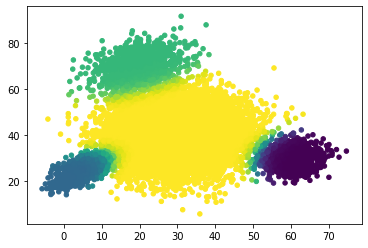

[ 761.031766    747.5881476  1005.61815198 9985.76193442]
[[60.18888592 30.19706343]
 [ 5.05762914 24.92561735]
 [20.03440687 69.84705825]
 [29.89602348 40.12512713]]
[[[16.85183429  0.25480605]
  [ 0.25480605 16.49425848]]

 [[15.19364592  9.62512826]
  [ 9.62512826 15.47152777]]

 [[35.58345594 11.08403916]
  [11.08403916 33.09593071]]

 [[74.52177023  5.20841362]
  [ 5.20841362 73.87257317]]]
-94439.9388863424


In [39]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#expectation_maximization = __import__('8-EM').expectation_maximization

initialize = __import__('4-initialize').initialize
expectation = __import__('6-expectation').expectation
maximization = __import__('7-maximization').maximization

def expectation_maximization(X, k, iterations=1000, tol=1e-5, verbose=False):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(k) is not int or k < 0:
        return None, None, None, None, None
    try:
        pi, m, S = initialize(X, k)
        i = 0
        prevl = 0
        while i < iterations:
            g, l = expectation(X, pi, m, S)
            pi, m, S = maximization(X, g)
            if verbose and (not i%10 or  round(prevl, 5) == round(l, 5)):
                print("Log Likelihood after {} iterations: {}".format(i, round(l, 5)))
            if l > tol or prevl == l:
                return pi, m, S, g, l
            i += 1
            prevl = l
        return pi, m, S, g, l
    except Exception:
        return None, None, None, None, None
    

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    k = 4
    pi, m, S, g, l = expectation_maximization(X, k, 150, verbose=True)
    clss = np.sum(g * np.arange(k).reshape(k, 1), axis=0)
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, c=np.arange(k), marker='*')
    plt.show()
    print(X.shape[0] * pi)
    print(m)
    print(S)
    print(l)

In [ ]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#expectation_maximization = __import__('8-EM').expectation_maximization

initialize = __import__('4-initialize').initialize
expectation = __import__('6-expectation').expectation
maximization = __import__('7-maximization').maximization

def expectation_maximization(X, k, iterations=1000, tol=1e-5, verbose=False):
    """ doc """
    if type(X) is not np.ndarray or X.ndim != 2\
       or type(k) is not int or k < 0:
        return None, None, None, None, None
    try:
        pi, m, S = initialize(X, k)
        i = 0
        prevl = 0
        g, l = expectation(X, pi, m, S)
        while i < iterations:
            pi, m, S = maximization(X, g)
            if verbose and (not i%10 or round(prevl, 5) == round(l, 5)):
                print("Log Likelihood after {} iterations: {}".format(i, round(l, 5)))
            if l >= tol or round(prevl, 5) == round(l, 5):
                return pi, m, S, g, l
            prevl = l
            g, l = expectation(X, pi, m, S)
            i += 1
            
        return pi, m, S, g, l
    except Exception:
        return None, None, None, None, None
    

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    k = 4
    pi, m, S, g, l = expectation_maximization(X, k, 150, verbose=True)
    clss = np.sum(g * np.arange(k).reshape(k, 1), axis=0)
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, c=np.arange(k), marker='*')
    plt.show()
    print(X.shape[0] * pi)
    print(m)
    print(S)
    print(l)